In [129]:
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3
c = -2
d = 3

In [132]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = d * (x_valid**3) + c * (x_valid**2) + b * x_valid + a # ideal (target) linear function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(d * (x_train**3) + c * (x_train**2) + b * x_train + a, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d * (x_valid**3) + c * (x_valid**2) + b * x_valid + a, sigma)

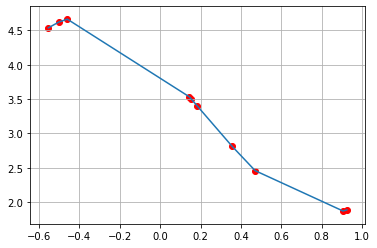

In [133]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [137]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [138]:
# get a summary of our composed model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [139]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Epoch 1/30
100/100 [==============================] - 0s 4ms/sample - loss: 13.1760 - mse: 13.1760 - val_loss: 10.6650 - val_mse: 10.6650
Epoch 2/30
100/100 [==============================] - 0s 621us/sample - loss: 11.3326 - mse: 11.3326 - val_loss: 9.2748 - val_mse: 9.2748
Epoch 3/30
100/100 [==============================] - 0s 446us/sample - loss: 9.8275 - mse: 9.8275 - val_loss: 8.0703 - val_mse: 8.0703
Epoch 4/30
100/100 [==============================] - 0s 728us/sample - loss: 8.5128 - mse: 8.5128 - val_loss: 7.0648 - val_mse: 7.0648
Epoch 5/30
100/100 [==============================] - 0s 740us/sample - loss: 7.4230 - mse: 7.4230 - val_loss: 6.2173 - val_mse: 6.2173
Epoch 6/30
100/100 [==============================] - 0s 686us/sample - loss: 6.5012 - mse: 6.5012 - val_loss: 5.4649 - val_mse: 5.4649
Epoch 7/30
100/100 [==============================] - 0s 858us/sample - loss: 5.6819 - mse: 5.6819 - val_loss: 4.7848 - val_mse: 4.7848

In [140]:
# return weights
model.get_weights()

[array([[-0.17543052]], dtype=float32), array([3.0790565], dtype=float32)]

In [141]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9288564920425415
Test accuracy: 0.9288565


In [142]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9288564920425415
Test accuracy: 0.9288565


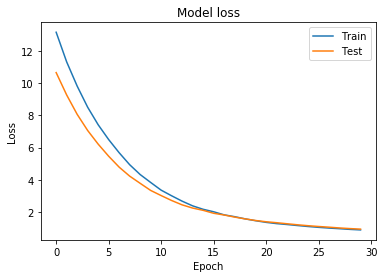

In [143]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

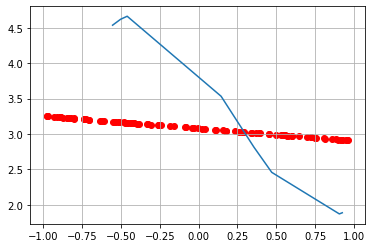

In [144]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()